In [9]:
import re
import pandas as pd
import numpy as np

# === Step 1: Load the file ===
deq_mpc_deq = "V4"
deq_mpc_nn = "V4 _ deq-mpc-nn"
deq_1_mpc = "V4 - deq-1-mpc"
diff_mpc_nn = "V4 Diff-mpc-nn"

file_path = "data/" + deq_mpc_deq  # Replace this with the actual path to your file
with open(file_path, "r") as file:
    lines = file.readlines()

# === Step 2: Extract the last trajectory vector from each 'desired pos:' line ===
last_trajectories = []

for line in lines:
    if "desired pos:" in line:
        # Find all coordinate vectors like [X Y Z]
        matches = re.findall(r'\[\s*([-+]?[\d\.]+)\s+([-+]?[\d\.]+)\s+([-+]?[\d\.]+)\s*\]', line)
        if matches:
            # Take only the last one from the line
            x, y, z = [float(coord) for coord in matches[-1]]
            last_trajectories.append([x, y, z])

# === Step 3: Store in a DataFrame ===
df = pd.DataFrame(last_trajectories, columns=["X", "Y", "Z"])

# === Step 4: (Optional) Save to CSV ===
# df.to_csv("trajectory.csv", index=False)

# === Step 5: Print first few rows ===
print(df.head())

trajectory = np.array(df[["X", "Y", "Z"]].values)  # Load from DataFrame


        X       Y       Z
0 -4.0000 -4.0000 -4.0000
1 -4.0428 -3.9286 -3.9992
2 -4.0411 -3.9314 -4.0156
3 -4.0577 -3.9342 -4.0903
4 -4.0894 -3.9369 -4.1352


Smoothly Interpolate the 3D Trajectory for Visualization

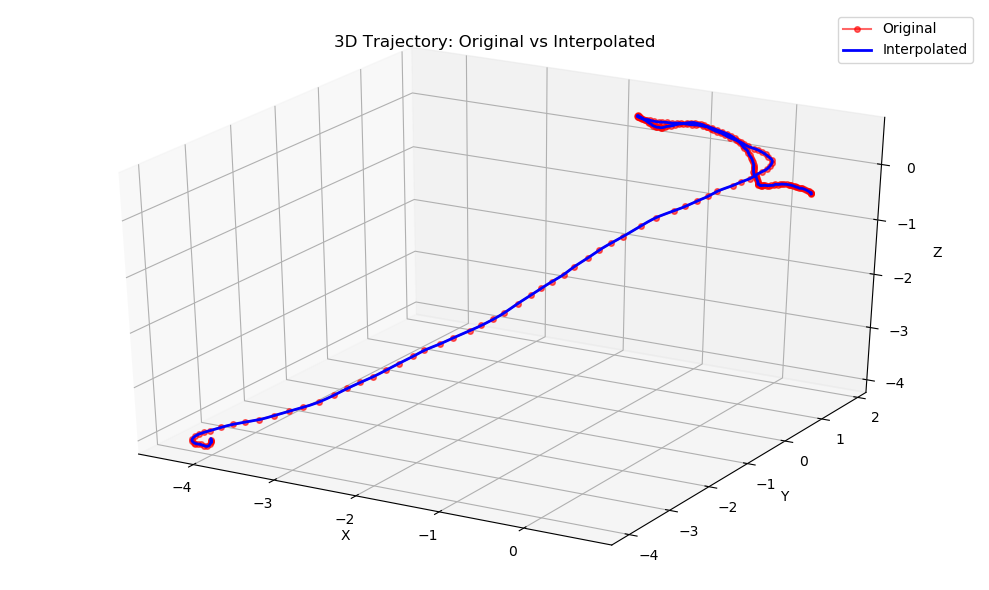

In [10]:
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D projection

# Extract x, y, z
x, y, z = trajectory.T

# Interpolate using a B-spline
tck, u = splprep([x, y, z], s=0)
u_fine = np.linspace(0, 1, 800)
x_new, y_new, z_new = splev(u_fine, tck)
# x_new, y_new, z_new = x, y, z
interpolated = np.stack((x_new, y_new, z_new), axis=-1)

# Plot original and interpolated
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Original trajectory
ax.plot(x, y, z, 'o-', label='Original', color='red', markersize=4, alpha=0.6)

# Interpolated trajectory
ax.plot(x_new, y_new, z_new, '-', label='Interpolated', color='blue', linewidth=2)

# Labels and legend
ax.set_title("3D Trajectory: Original vs Interpolated")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
ax.view_init(elev=30, azim=-60)  # Optional: rotate for better view

plt.tight_layout()
plt.show()

In [11]:
# Obstacle positions
obstacle_positions = np.array([[-0.81024811,  2.47097938, -1.46527507],
                                [ 4.25182361,  2.61438853, -3.99336202],
                                [-1.88037898,  0.56471661, -4.89251658],
                                [-0.89694315, -1.17227775, -2.31071003],
                                [ 0.31117451,  1.80695677, -1.32360805],
                                [-0.83515347, -3.00524971, -0.37880997],
                                [ 0.42646518, -2.55505666, -1.4580139 ],
                                [-3.06794499, -3.75663134, -2.68146399],
                                [-2.47485677, -3.2241943 ,  4.05956764],
                                [ 4.90234242, -0.44360142,  3.00769067],
                                [-0.4466156 ,  2.82236085, -3.70498888],
                                [-3.30175667, -0.37915783,  3.76276084],
                                [-1.55007116,  2.10577068,  1.29878497],
                                [-3.18635985,  1.77041154,  2.70392382],
                                [ 4.59851198,  1.34127491, -3.2508418 ],
                                [-1.37583745, -2.16044885,  2.95391448],
                                [-0.86607566,  1.90383346, -2.29595208],
                                [-3.90222124,  3.93796524, -4.8222375 ],
                                [ 1.83414656, -4.90150613, -3.97004479],
                                [ 2.10004524,  4.32631374, -1.7743607 ],
                                [-0.73089303,  0.71350811,  4.39234036],
                                [-0.57377963, -1.27260017, -4.02256416],
                                [ 4.17079007,  1.09192127,  3.44064471],
                                [ 0.12940132,  2.81247143,  0.63458352],
                                [ 0.64863905,  3.19743266,  2.347993  ],
                                [-0.23519056, -3.91345489, -1.63826518],
                                [ 3.18776744, -3.65825113,  3.33950477],
                                [ 4.04449088,  1.13759982, -2.09952288],
                                [ 1.34288453,  4.09059731,  4.26551507],
                                [ 2.60116671,  3.27868729, -2.24891686],
                                [ 2.45285101, -1.71007925,  3.67593524],
                                [ 0.75708598,  0.37944072,  1.00573208],
                                [-1.8836751 ,  3.45417808, -3.70553914],
                                [-2.48427958, -2.98336577, -3.69115236],
                                [ 2.53442509,  1.69021664,  4.56683953],
                                [-3.40910921, -1.15168358, -3.11048661],
                                [-1.85093449, -3.27903642,  4.40783757],
                                [ 1.11234478, -2.84715317,  1.92532219],
                                [-0.23470463, -4.51888895,  0.77568075],
                                [-1.32348548,  1.48201938,  1.9124648 ]])

# Sphere radius
radius = 0.4
real_radius = 0.4

# Gentle pastel RGBA colors
color_list = [
    [0.8, 0.6, 0.6, 0.5],  # soft rose
    [0.6, 0.8, 0.6, 0.5],  # pale mint
    [0.6, 0.6, 0.8, 0.5],  # light lavender
    [0.9, 0.8, 0.6, 0.5],  # peach
    [0.7, 0.7, 0.5, 0.5],  # sage
    [0.7, 0.8, 0.9, 0.5],  # powder blue
    [0.9, 0.7, 0.8, 0.5],  # pink blush
    [0.6, 0.7, 0.6, 0.5],  # soft moss
    [0.7, 0.8, 0.7, 0.5],  # light olive
    [0.85, 0.85, 0.9, 0.5],# cloudy white
]
num_colors = len(color_list)
green_color = np.array([0.0, 0.5, 0.0, 0.5])  # green color for the sphere
red_color = np.array([1.0, 0.0, 0.0, 0.5])
goal_pos = np.array([0.0, 0.0, 0.0])  # goal position

In [12]:
import mujoco
import mujoco.viewer
import numpy as np
import time
import os

# Load a basic world (flat plane)
model_path = "bitcraze_crazyflie_2/scene.xml"
model = mujoco.MjModel.from_xml_path(model_path)
data = mujoco.MjData(model)

# Set camera to "overview"
cam_id = mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_CAMERA, "overview")

# Get the body ID of the drone
drone_body_id = mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_BODY, "cf2")

# Start viewer
with mujoco.viewer.launch_passive(model, data) as viewer:
    viewer.cam.type = mujoco.mjtCamera.mjCAMERA_TRACKING
    viewer.cam.trackbodyid = drone_body_id
    viewer.cam.distance = 12
    viewer.cam.azimuth = 53.3535433070867
    viewer.cam.elevation = -5.220472440944877
    viewer.cam.lookat = [4.460169667856987, -1.3941552068754406, -3.3073227810126187]

    trail = []  # for drawing trajectory path

    time.sleep(5)
    # input("Press Enter to continue...")
    
    for idx, point in enumerate(interpolated):
        viewer.cam.azimuth -= 0.1
        if (len(trail) > len(interpolated) // 2 - 10) and (len(trail) < len(interpolated) // 2 + 10):
            viewer.cam.azimuth -= 5.0
        # viewer.cam.elevation -= 0.5
        viewer.user_scn.ngeom = 0
        i = 0

        # # Goal marker
        # mujoco.mjv_initGeom(
        #     viewer.user_scn.geoms[i],
        #     type=mujoco.mjtGeom.mjGEOM_BOX,
        #     size=[0.1] * 3,
        #     pos=goal_pos.astype(np.float32),
        #     mat=np.eye(3).flatten(),
        #     rgba=np.array([0.0, 0.5, 0.0, 0.2], dtype=np.float32),
        # )
        # i += 1

        # Obstacle markers
        for pos in obstacle_positions:
            color = color_list[i % num_colors]
            if np.linalg.norm(pos - point) <= real_radius:
                color = red_color
            mujoco.mjv_initGeom(
                viewer.user_scn.geoms[i],
                type=mujoco.mjtGeom.mjGEOM_SPHERE,
                size=[radius, 0, 0],
                pos=pos.astype(np.float32),
                mat=np.eye(3).flatten(),
                rgba=np.array(color, dtype=np.float32),
            )
            i += 1

        # Append current position to trail
        if (idx % 10 == 0):
            trail.append(point.copy())

        # Draw breadcrumb trail
        for pos in trail:
            mujoco.mjv_initGeom(
                viewer.user_scn.geoms[i],
                type=mujoco.mjtGeom.mjGEOM_SPHERE,
                size=[0.02, 0, 0],
                pos=pos.astype(np.float32),
                mat=np.eye(3).flatten(), 
                rgba=np.array([0.5, 0.5, 0.5, 0.8], dtype=np.float32),
            )
            i += 1

        viewer.user_scn.ngeom = i

        # Move and spin the drone
        data.qpos[:3] = point
        data.qvel[:] = 0.0
        data.ctrl[:] = 0.0  # spin
        mujoco.mj_step(model, data)
        viewer.sync()
        time.sleep(0.015)
    
    time.sleep(5)
    # input("Press Enter to continue...")

    # Get camera parameters
    cam = viewer.cam
    camera_pose = {
        'azimuth': cam.azimuth,
        'elevation': cam.elevation,
        'distance': cam.distance,
        'lookat': cam.lookat.copy().tolist()
    }

    print("Saved camera pose:", camera_pose)

Saved camera pose: {'azimuth': -66.89645669291389, 'elevation': -12.720472440944874, 'distance': 12.0, 'lookat': [0.6600999999999998, 1.2044000000000006, -0.2501196199592304]}
